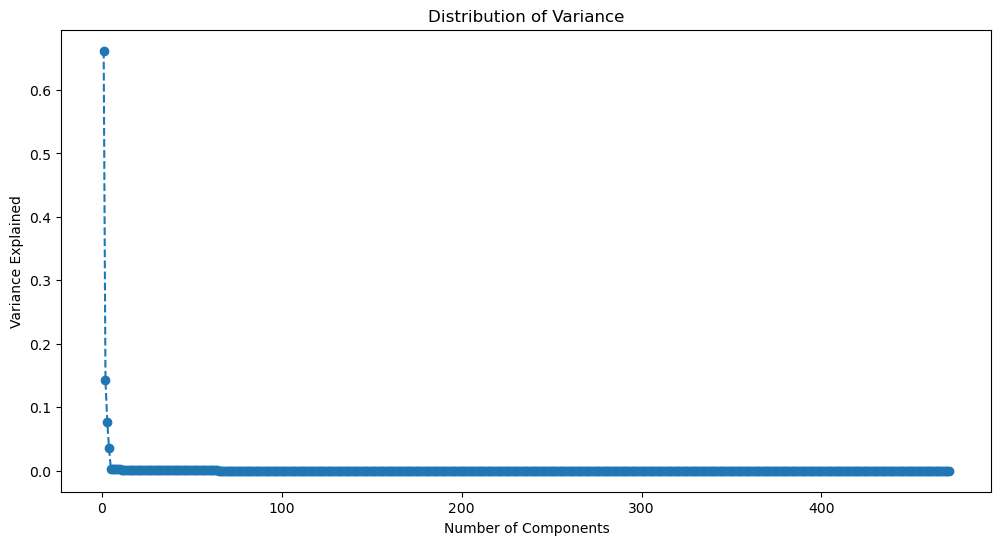

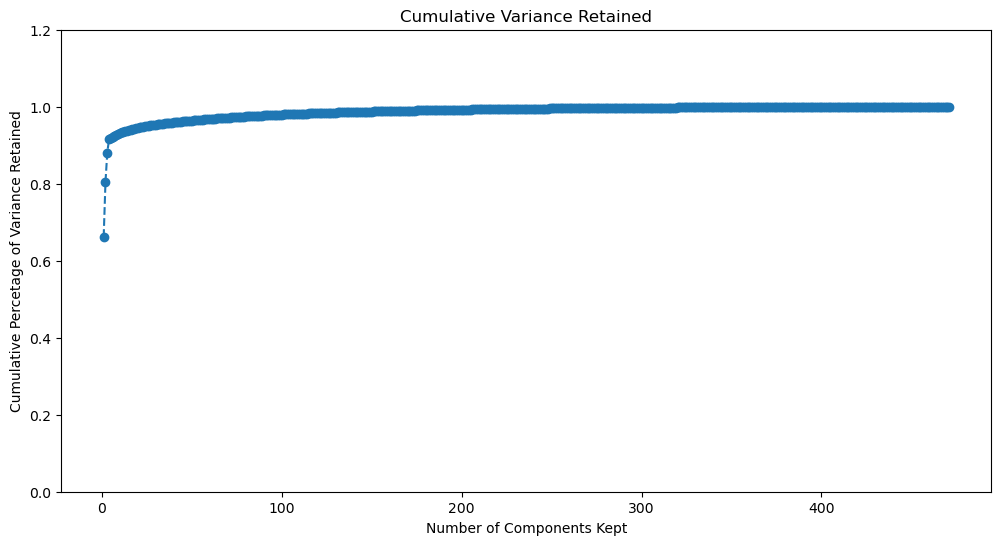

2

In [14]:
# Problem 1
# 1a. 1b. 1c. 1d.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df_prices = pd.read_csv('SP500_close_price_no_missing.csv')

# Convert the 'date' column to datetime and set it as the index
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices.set_index('date', inplace=True)

# Calculate the log returns
log_returns = np.log(df_prices / df_prices.shift(1))

# Drop the first row as it will be NaN due to the shift operation
log_returns = log_returns.dropna()

# Fit a PCA model to log returns
pca = PCA()
pca.fit(log_returns)

# Plot a screen plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Distribution of Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components Kept')
plt.ylabel('Cumulative Percetage of Variance Retained')
plt.ylim(0, 1.2)  # Setting the y-axis to start at 0 and end at 1
plt.show()

# Determine the number of principal components to retain for at least 80% of total variance
num_components_80 = np.where(cumulative_variance >= 0.8)[0][0] + 1  # Adding 1 because index starts at 0
num_components_80


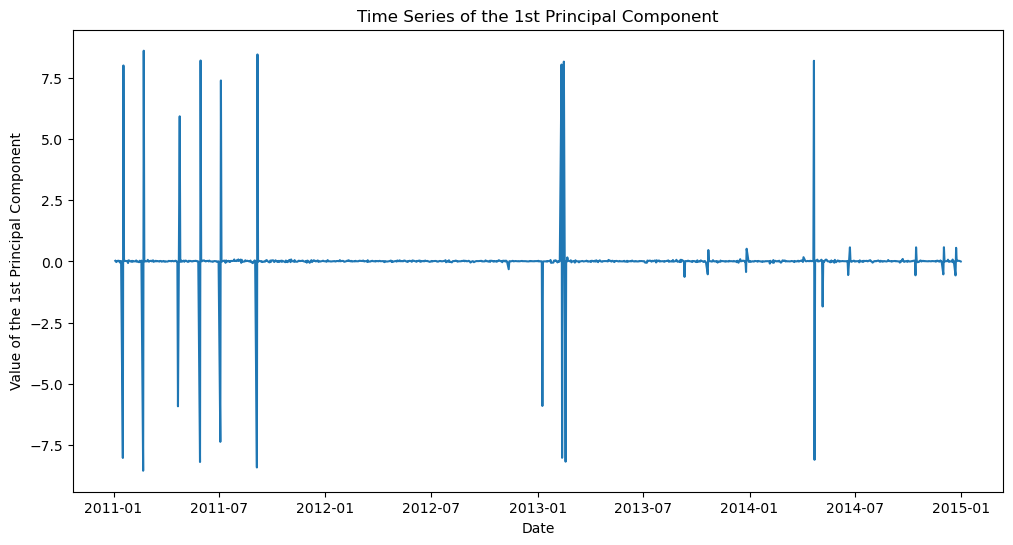

In [21]:
# Problem 1
# 1b.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Update the file path according to where your dataset is stored
file_path_prices = 'SP500_close_price_no_missing.csv'
df_prices = pd.read_csv(file_path_prices)

# Convert the 'date' column to datetime and set it as the index
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices.set_index('date', inplace=True)

# Calculate the log returns
log_returns = np.log(df_prices / df_prices.shift(1))
log_returns = log_returns.dropna()

# Fit a PCA model to log returns
pca = PCA()
pca.fit(log_returns)

# Extract the time series of the 1st principal component
first_component_time_series = pca.transform(log_returns)[:, 0]

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(df_prices.index[1:], first_component_time_series)  # Skip the first date due to dropna
plt.title('Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value of the 1st Principal Component')
plt.show()


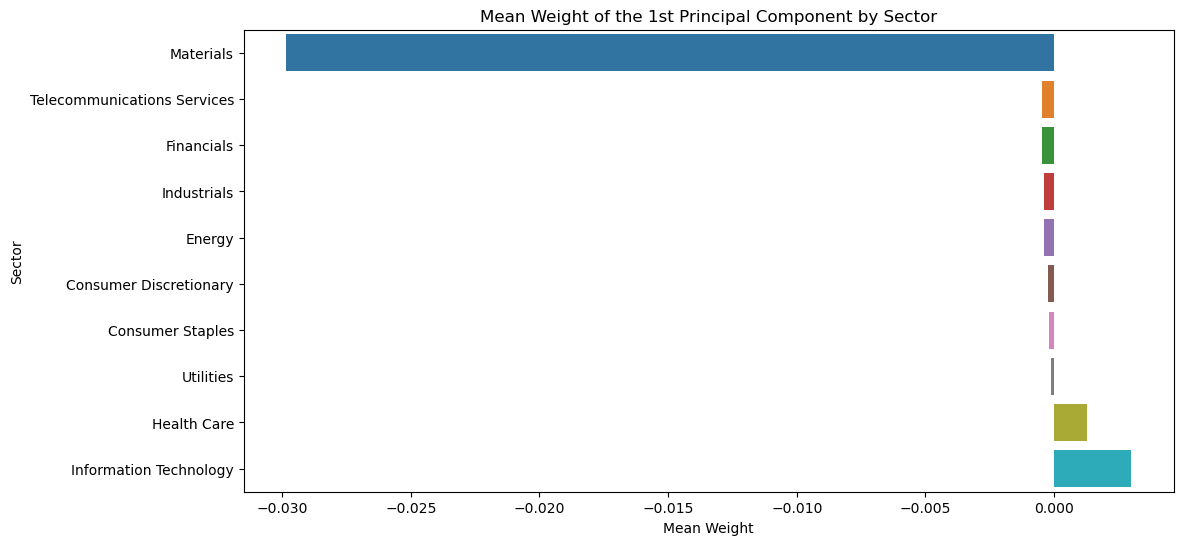

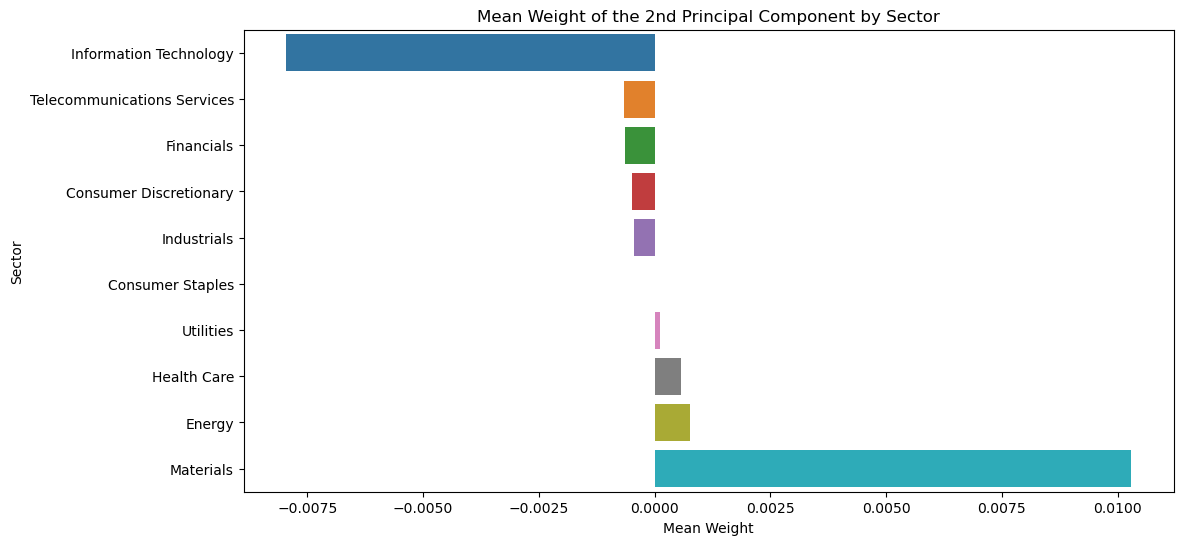

In [18]:
# Problem 1
# 2b. 3b. 4b.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the stock prices dataset (assuming the variable name is df_prices)
# Load the ticker information
df_tickers = pd.read_csv('SP500_ticker.csv')

# Assuming you have already calculated log_returns and fitted the PCA model
pca = PCA()
pca.fit(log_returns)

# Extract the weights from the PCA model for the 1st and 2nd principal components
weights_first_component = pca.components_[0]
weights_second_component = pca.components_[1]

# Create a dataframe for the weights
df_weights = pd.DataFrame({
    'Ticker': df_prices.columns,
    'Weight 1st Component': weights_first_component,
    'Weight 2nd Component': weights_second_component
})

# Merge the weights dataframe with the tickers dataframe to get the sector information
df_merged = pd.merge(df_weights, df_tickers, how='left', left_on='Ticker', right_on='ticker')

# Group by sector and calculate mean weight for the 1st principal component
sector_weights_1st_component = df_merged.groupby('sector')['Weight 1st Component'].mean().sort_values()

# Plotting the mean weight per sector for the 1st principal component
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_weights_1st_component.values, y=sector_weights_1st_component.index)
plt.title('Mean Weight of the 1st Principal Component by Sector')
plt.xlabel('Mean Weight')
plt.ylabel('Sector')
plt.show()

# Similar plot for the 2nd principal component
sector_weights_2nd_component = df_merged.groupby('sector')['Weight 2nd Component'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_weights_2nd_component.values, y=sector_weights_2nd_component.index)
plt.title('Mean Weight of the 2nd Principal Component by Sector')
plt.xlabel('Mean Weight')
plt.ylabel('Sector')
plt.show()


[*********************100%%**********************]  5 of 5 completed
Explained variance by each component: [0.67187392 0.11984545 0.08624358 0.07982379 0.04221327]


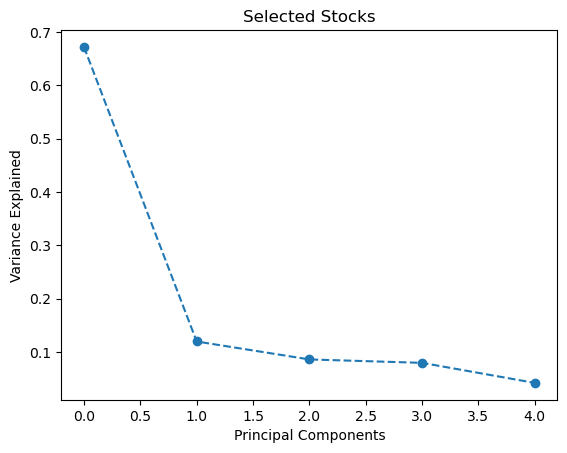

In [35]:
# Problem 1
# c Bonus points

import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# List of stock tickers to analyze
tickers = ['MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META']

# Fetch historical market data for these stocks
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate log returns for the stocks
log_returns = np.log(data / data.shift(1)).dropna()

# Apply PCA on log returns
pca = PCA()
pca.fit(log_returns)

# Analyze PCA results (example: Explained Variance)
print("Explained variance by each component:", pca.explained_variance_ratio_)

# Additional PCA analysis can be performed here...

# Plotting (example: screen plot)
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Selected Stocks')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()


In [39]:
# Problem 2
# a)

import pandas as pd
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the BMI data
file_path = 'BMI.csv'  # Replace with the correct file path
bmi_data = pd.read_csv(file_path)

# Preparing the data
X = bmi_data.drop('fatpctg', axis=1)
y = bmi_data['fatpctg']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Linear Regression as the model
lr = LinearRegression()

# Forward Selection using RFE
rfe_forward = RFE(lr, n_features_to_select=1, step=1)
rfe_forward.fit(X_train, y_train)
feature_ranking_forward = pd.Series(rfe_forward.ranking_, index=X.columns).sort_values()

# Backward Elimination using RFECV for automatic feature selection with cross-validation
rfe_backward = RFECV(lr, step=1, cv=5)
rfe_backward.fit(X_train, y_train)
feature_ranking_backward = pd.Series(rfe_backward.ranking_, index=X.columns).sort_values()

# Display the feature rankings from Forward Selection
print("Feature Rankings (Forward Selection):")
print(feature_ranking_forward)

# Display the feature rankings from Backward Elimination
print("\nFeature Rankings (Backward Elimination):")
print(feature_ranking_backward)

Feature Rankings (Forward Selection):
Wrist       1
Abdomen     2
Neck        3
Hip         4
Biceps      5
Chest       6
Ankle       7
Height      8
Knee        9
Forearm    10
Thigh      11
Age        12
Weight     13
dtype: int32

Feature Rankings (Backward Elimination):
Neck        1
Abdomen     1
Wrist       1
Hip         2
Biceps      3
Chest       4
Ankle       5
Height      6
Knee        7
Forearm     8
Thigh       9
Age        10
Weight     11
dtype: int32


In [41]:
# Problem 2
# b)

# Ranking features using correlation statistics
correlations = bmi_data.corr()['fatpctg'].drop('fatpctg').abs().sort_values(ascending=False)

# Print the results of feature ranking using correlation statistics
print("Feature Ranking based on Correlation with 'fatpctg':")
print(correlations)

Feature Ranking based on Correlation with 'fatpctg':
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


In [43]:
# Problem 2
# c)

from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

# Lasso Regression
lasso = LassoCV(cv=5).fit(X_train, y_train)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Random Forest for feature importance ranking
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print the results of feature importance from Lasso Regression
print("Feature Importance from Lasso Regression:")
print(lasso_coefficients)

# Print the results of feature importance from Random Forest
print("\nFeature Importance from Random Forest:")
print(rf_importances)


Feature Importance from Lasso Regression:
Age        0.056882
Weight    -0.051150
Height    -0.078436
Neck      -0.384227
Chest     -0.079819
Abdomen    0.945944
Hip       -0.007651
Thigh      0.079321
Knee      -0.000000
Ankle      0.016629
Biceps     0.184452
Forearm    0.053926
Wrist     -1.903463
dtype: float64

Feature Importance from Random Forest:
Abdomen    0.669289
Chest      0.043654
Wrist      0.038207
Height     0.031692
Neck       0.030565
Hip        0.029417
Age        0.026801
Knee       0.026054
Ankle      0.024169
Weight     0.023675
Biceps     0.022949
Forearm    0.020784
Thigh      0.012744
dtype: float64
